In [178]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df= pd.read_csv("data/data1.csv")

In [180]:
df

,pool_id,cycle,date,surface(ha),days,week,surviving,density(shrimp),density(shrimp/ha),weight(g),growth,biomass(kg),biomass(kg/ha),food(kg),food(kg/ha),type_feeding,Medicion,Alimento acumulado [Kg],FCA
0,4,2020,2020-07-01,4.90,0,0.000000,1.000,998000.0,203673.469388,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,4,2020,2020-07-02,4.90,1,0.142857,0.980,978040.0,199600.000000,0.1500,0.0000,146.7060,29.940000,37.5,7.653061224489796,Boleo,NaN,37.5,375.000000
2,4,2020,2020-07-03,4.90,2,0.285714,0.970,968060.0,197563.265306,0.1800,0.0300,174.2508,35.561388,40.0,8.16326530612245,Boleo,NaN,77.5,2.803421
3,4,2020,2020-07-04,4.90,3,0.428571,0.960,958080.0,195526.530612,0.2400,0.0600,229.9392,46.926367,40.0,8.16326530612245,Boleo,NaN,117.5,1.410002
4,4,2020,2020-07-05,4.90,4,0.571429,0.950,948100.0,193489.795918,0.3000,0.0600,284.4300,58.046939,50.0,10.204081632653061,Boleo,NaN,167.5,1.215318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,9,2020,2020-08-30,2.31,52,7.428571,0.794,317600.0,137489.177489,13.4575,0.5425,4274.1020,1850.260606,0.0,0,AA/platos,NaN,4640.0,1.116941
147,9,2020,2020-08-31,2.31,53,7.571429,0.792,316800.0,137142.857143,14.0000,0.5425,4435.2000,1920.000000,150.0,64.93506493506493,AA/platos,1.0,4790.0,1.110004
148,9,2020,2020-09-01,2.31,54,7.714286,0.790,316000.0,136796.536797,14.1200,0.1200,4461.9200,1931.567100,150.0,64.93506493506493,AA/platos,NaN,4940.0,1.137719
149,9,2020,2020-09-02,2.31,55,7.857143,0.788,315200.0,136450.216450,14.2400,0.1200,4488.4480,1943.051082,150.0,64.93506493506493,AA/platos,NaN,5090.0,1.165147


6. Obtener el promedio de supervivencia por semana y por piscinas y graficar
7. Hacer un grafico del FCA final con ejes en español
8. Ordenar a las pisicnas por el crecimiento semanalas y graficar
9. Calcular el crecimiento semanal y graficar (Crecimiento = Peso_final-Peso_inicial)
10. Calcular la temp media, min y max y graficar
11. Calcular la concentracion de oxigeno y graficar un boxplot por hora (saturacion/DO)

In [10]:
#6 Obtener el promedio de supervivencia por semana y por piscinas y graficar
df["semana"]=df["week"]//1
data=df.groupby(by=["pool_id","semana"],as_index= False)["surviving"].mean()
data

,pool_id,semana,surviving
0,4,0.0,0.961429
1,4,1.0,0.905143
2,4,2.0,0.889500
3,4,3.0,0.879000
4,4,4.0,0.867786
5,4,5.0,0.864000
6,4,6.0,0.851143
7,4,7.0,0.842571
8,4,8.0,0.826000
9,4,9.0,0.816286


Text(0.5, 1.0, 'Supervivencia promedio semanal')

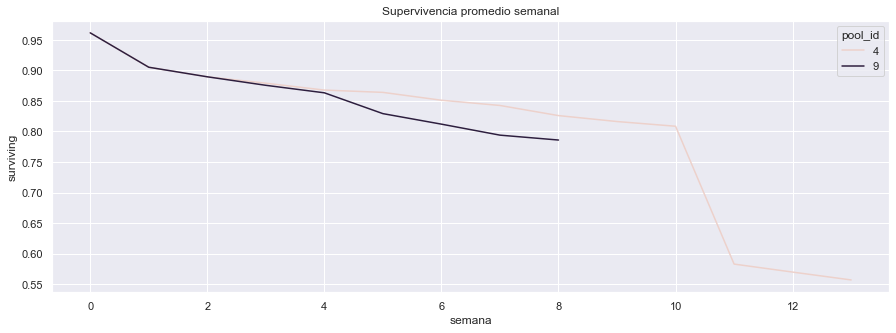

In [9]:
sns.set(rc={"figure.figsize":(15,5)})
sns.lineplot(x=data["semana"],y=data["surviving"],hue=data["pool_id"])
plt.title("Supervivencia promedio semanal")

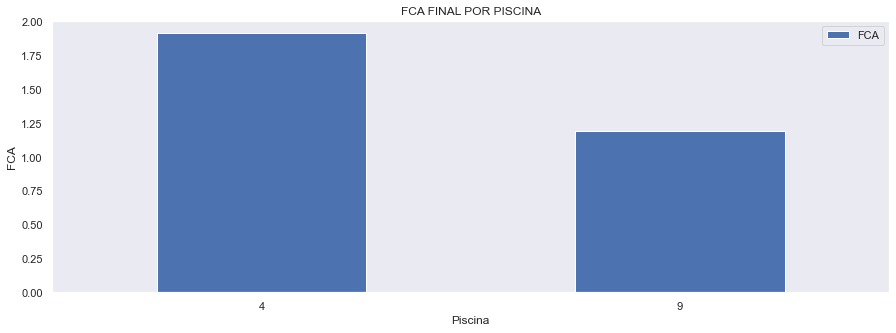

In [6]:
#7 Hacer un grafico del FCA final con ejes en español
df.groupby("pool_id")["FCA"].last().plot(kind="bar")
plt.title("FCA FINAL POR PISCINA")
plt.legend()
plt.ylabel("FCA")
plt.xlabel("Piscina")
plt.grid(alpha=.2)
plt.xticks(rotation=0)
plt.savefig("FCA final por piscina")

In [18]:
#9 Calcular el crecimiento semanal y graficar (Crecimiento = Peso_final-Peso_inicial)
df["semana"]=df["week"]//1
data2=df.groupby(by=["pool_id","semana"],as_index="false")["weight(g)"].agg(["last","first"])
data2["crecimiento"]=data2["last"]-data2["first"]
data2 = data2.reset_index()

In [19]:
data2

,pool_id,semana,last,first,crecimiento
0,4,0.0,0.500,0.15,0.350
1,4,1.0,1.230,0.64,0.590
2,4,2.0,2.520,1.39,1.130
3,4,3.0,3.670,2.92,0.750
4,4,4.0,5.410,3.95,1.460
5,4,5.0,7.450,5.79,1.660
6,4,6.0,9.460,7.70,1.760
7,4,7.0,11.200,9.73,1.470
8,4,8.0,13.530,11.50,2.030
9,4,9.0,15.300,13.76,1.540


[]

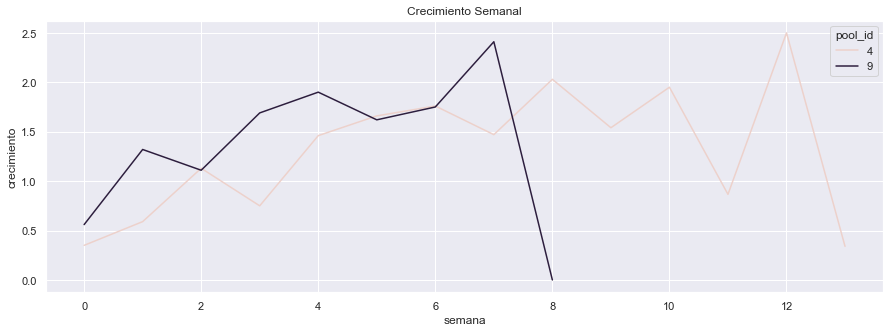

In [29]:
sns.set(rc={"figure.figsize":(15,5)})
sns.lineplot(x=data2["semana"],y=data2["crecimiento"],hue=data["pool_id"])
plt.title("Crecimiento Semanal")
plt.plot()

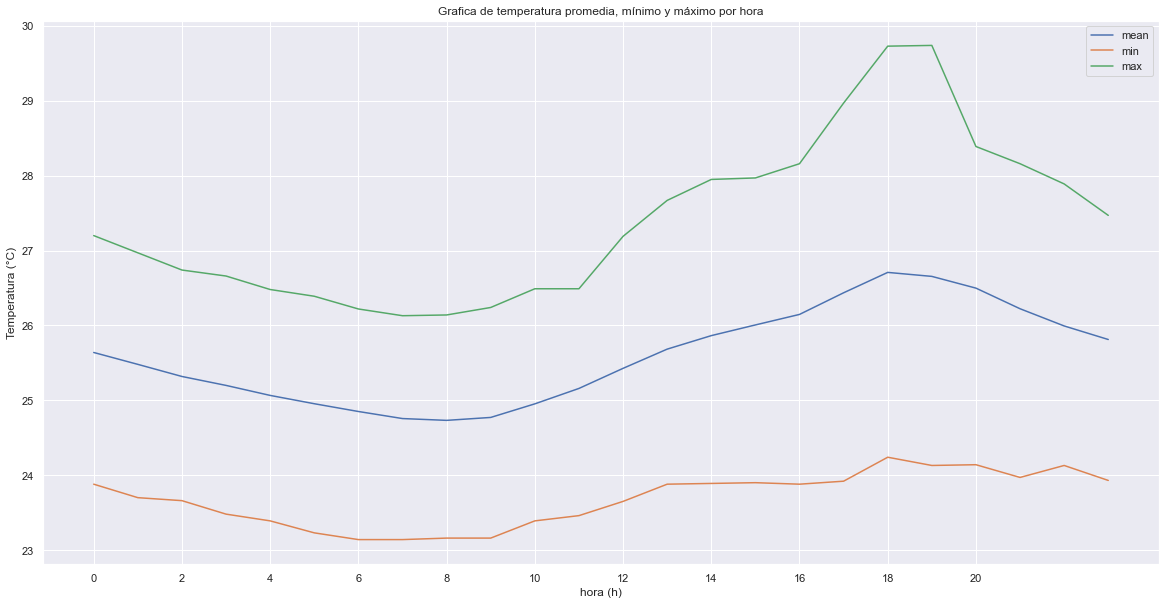

In [249]:
#Calcular la temp media, min y max y graficar
df_temp = pd.read_pickle("C:/Users/Kleber/Documents/Capacitaciones/data/temp.pkl")
df_temp = df_temp.reset_index()
df_temp["hora"]=df_temp["time"].dt.hour
tabla=df_temp.groupby(by="hora",as_index= False)["value"].agg(["mean","min","max"]).plot()
plt.title("Grafica de temperatura promedia, mínimo y máximo por hora")
plt.legend()
plt.ylabel("Temperatura (°C)")
plt.xlabel("hora (h)")
plt.xticks(rotation=0)
plt.xticks(np.arange(0,21, 2))
plt.show()


In [257]:
#Calcular la concentracion de oxigeno y graficar un boxplot por hora (saturacion/DO)
df_O= pd.read_pickle("C:/Users/Kleber/Documents/Capacitaciones/data/do.pkl")


In [191]:
temperatura=df_temp.groupby(by="hour",as_index= False)["value"].mean()
temperatura=temperatura.rename({"value":"temperatura"},axis=1)
DO=df_O.groupby(by="hour",as_index= False)["value"].mean()
DO=DO.rename({"value":"OD"},axis=1)
df2=pd.merge(OD,temperatura,on="hour",how="outer")


In [187]:
def get_saturacion_DO(temperature, salinidad):
    x, y = temperature, salinidad
    var = np.array([x, y, x*y, x*y**2, x**2, y**2, y*x**2, x**4])
    coef = np.array([-3.6990e-01, -9.4454e-02,  2.5591e-03, -3.4891e-06, 4.9856e-03,  2.1292e-04, -2.5916e-05, -5.2018e-07])
    bias = 14.5176
    saturacion = (var*coef).sum() + bias
    return saturacion

In [192]:
df2["saturacion"]=df2['temperatura'].apply(lambda x: get_saturacion_DO(x, 5))

In [189]:
df2["concentracion DO"]=df2["OD"]/df2["saturacion"]
df2

,hour,OD,temperatura,saturacion,concentracion DO
0,0,5.003950,25.638992,7.859980,0.636636
1,1,4.613045,25.480199,7.882799,0.585204
2,2,4.210650,25.318526,7.906178,0.532577
3,3,3.903238,25.199163,7.923534,0.492613
4,4,3.631984,25.065560,7.943059,0.457253
5,5,3.321743,24.954556,7.959359,0.417338
6,6,3.034836,24.850769,7.974664,0.380560
7,7,2.917049,24.756492,7.988622,0.365150
8,8,2.995939,24.732308,7.992211,0.374857
9,9,3.219358,24.771455,7.986403,0.403105


In [253]:
temperatura=df_temp.drop(["time","mes","hora","minute"],axis=1)
temperatura=temperatura.rename({"value":"temperatura"},axis=1)
temperatura

,temperatura,hour,day
0,25.19,10,3
1,25.21,10,3
2,25.19,10,3
3,25.39,10,3
4,25.48,11,3
...,...,...,...
5892,25.17,9,14
5893,24.63,9,14
5894,25.23,9,14
5895,25.40,9,14


In [262]:
Oxigeno=df_O.drop(["mes","minute"],axis=1)
Oxigeno=Oxigeno.rename({"value":"OD"},axis=1)
Oxigeno = Oxigeno.reset_index()
Oxigeno

,time,OD,hour,day
0,2020-08-03 10:13:40,2.88,10,3
1,2020-08-03 10:29:05,3.52,10,3
2,2020-08-03 10:44:30,3.68,10,3
3,2020-08-03 11:00:03,5.32,11,3
4,2020-08-03 11:15:26,5.68,11,3
...,...,...,...,...
5755,2020-10-14 09:11:54,-0.03,9,14
5756,2020-10-14 09:27:19,-0.04,9,14
5757,2020-10-14 09:42:44,0.21,9,14
5758,2020-10-14 09:58:08,0.20,9,14


In [264]:
datos=pd.merge(Oxigeno,temperatura,on="day",how="outer")
datos

,time,OD,hour_x,day,temperatura,hour_y
0,2020-08-03 10:13:40,2.88,10,3,25.19,10
1,2020-08-03 10:13:40,2.88,10,3,25.21,10
2,2020-08-03 10:13:40,2.88,10,3,25.19,10
3,2020-08-03 10:13:40,2.88,10,3,25.39,10
4,2020-08-03 10:13:40,2.88,10,3,25.48,11
...,...,...,...,...,...,...
1198349,2020-10-02 23:51:39,6.70,23,2,26.43,22
1198350,2020-10-02 23:51:39,6.70,23,2,26.44,23
1198351,2020-10-02 23:51:39,6.70,23,2,26.41,23
1198352,2020-10-02 23:51:39,6.70,23,2,26.22,23


In [269]:
datos["saturacion"]=datos['temperatura'].apply(lambda x: get_saturacion_DO(x, 5))
datos["concentracion OD"]=datos["OD"]/datos["saturacion"]
datos

,time,OD,hour_x,day,temperatura,hour_y,saturacion,concentracion OD
0,2020-08-03 10:13:40,2.88,10,3,25.19,10,7.924870,0.363413
1,2020-08-03 10:13:40,2.88,10,3,25.21,10,7.921955,0.363547
2,2020-08-03 10:13:40,2.88,10,3,25.19,10,7.924870,0.363413
3,2020-08-03 10:13:40,2.88,10,3,25.39,10,7.895824,0.364750
4,2020-08-03 10:13:40,2.88,10,3,25.48,11,7.882828,0.365351
...,...,...,...,...,...,...,...,...
1198349,2020-10-02 23:51:39,6.70,23,2,26.43,22,7.748394,0.864695
1198350,2020-10-02 23:51:39,6.70,23,2,26.44,23,7.747005,0.864850
1198351,2020-10-02 23:51:39,6.70,23,2,26.41,23,7.751173,0.864385
1198352,2020-10-02 23:51:39,6.70,23,2,26.22,23,7.777685,0.861439


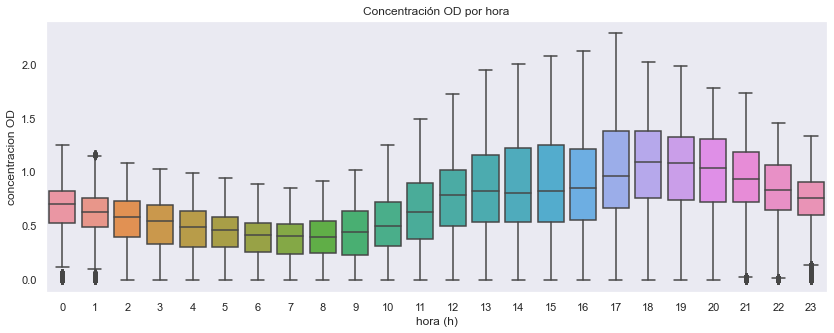

In [273]:
plt.figure(figsize=(14,5))
sns.boxplot(data=datos, x='hour_x',y="concentracion OD")
plt.title("Concentración OD por hora")
plt.grid(axis="y", alpha=3)
plt.xlabel("hora (h)")
plt.show()